<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [ ]:
# addprocs(7)
# println("Start")
# println("Load module")
# @everywhere push!(LOAD_PATH, ".")
# @everywhere using RobustOptimization
# @everywhere using ScikitLearn
# @everywhere using Ipopt, PyPlot
# @everywhere @sk_import model_selection: train_test_split
# @everywhere @sk_import metrics: r2_score

# @everywhere nbfeatures = 13
# @everywhere solver = IpoptSolver(print_level = 2)

# println("Create data")
# @everywhere df_train, df_test = create_data("housing_scale", nbfeatures, 0.1, train_test_split)


# println("Define model")
# @everywhere N = size(df_train)[1]
# @everywhere ϵ = 0.1
# @everywhere verbosity = 500
# @everywhere itmax = 5000
# @everywhere sample = 4

# @everywhere ambiguity = "wasserstein"
# @everywhere robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LinearRegression())
# @everywhere α = 1/norm(robustModel.descent_direction)
# @everywhere projParams = ProjParams(Int(1e6), 1e-5, sample, para_proj=Sequential(), para_inter=Sequential())
# @everywhere optParams = OptParams(itmax, 1e-7, α, verbosity = verbosity);

In [14]:
println("Start")
println("Load module")
push!(LOAD_PATH, ".")
using RobustOptimization
using ScikitLearn
using Ipopt, PyPlot
@sk_import model_selection: train_test_split
@sk_import metrics: r2_score

nbfeatures = 13
solver = IpoptSolver(print_level = 2)

println("Create data")
df_train, df_test = create_data("housing_scale", nbfeatures, 0.7, train_test_split)


println("Define model")
N = size(df_train)[1]
ϵ = 0.05
verbosity = 100
itmax = 5000
sample = 4

ambiguity = "KLdivergence"
robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LinearRegression())
α = 1/norm(robustModel.descent_direction)
projParams = ProjParams(Int(1000), 1e-5, sample, para_proj=Sequential(), para_inter=Sequential())
optParams = OptParams(itmax, 1e-7, α, verbosity = verbosity);

Start
Load module
Create data
Define model


In [15]:
xnormal = normal_opt(df_train, solver, robustModel.regressionModel)
y_true = df_test[:,end];

In [16]:
dm_div = []
xr1_div = []
xr2_div = []
r1_div = []
r2_div = []
for ϵ in [0.001,0.005,0.01,0.05,0.1,0.5]
    println(" ")
    println("espilon = ", ϵ)
    println(" ")
    robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LinearRegression())
    x0 = initialize(df_train, robustModel, DivergenceSet())
    xalg, yalg, dm, mem, mini = run_algo(x0, df_train, robustModel, optParams, projParams)
    xrobust1 = getsolution(xalg, ambiguity, nbfeatures)
    xrobust2 = getsolution(mem, ambiguity, nbfeatures)
    y_pred1 = pred(df_test, xrobust1, robustModel.regressionModel)
    y_pred2 = pred(df_test, xrobust2, robustModel.regressionModel)
    r1 = r2_score(y_true, y_pred1)
    r2 = r2_score(y_true, y_pred2)
    push!(dm_div, dm)
    push!(xr1_div, xrobust1)
    push!(xr2_div, xrobust2)
    push!(r1_div, r1)
    push!(r2_div, r2)
end

 
espilon = 0.001
 
100 0.0 200 0.0 300 0.0 400 0.0 500 1.1102230246251565e-15 600 0.0 700 0.0 800 0.0 900 0.0 1000 0.0 1100 0.0 1200 0.0 1300 0.0 1400 0.0 1500 0.0 1600 0.0 1700 0.0 1800 0.0 1900 0.0 2000 0.0 2100 0.0 2200 0.0 2300 0.0 2400 0.0 2500 0.0 2600 0.0 2700 0.0 2800 0.0 2900 0.0 3000 0.0 3100 0.0 3200 0.0 3300 0.0 3400 0.0 3500 0.0 3600 0.0 3700 0.0 3800 0.0 3900 0.0 4000 0.0 4100 0.0 4200 0.0 4300 0.0 4400 0.0 4500 0.0 4600 0.0 4700 0.0 4800 0.0 4900 0.0 5000 0.0  
espilon = 0.005
 
100 0.0 200 0.0 300 0.0 400 0.0 500 0.0 600 0.0 700 0.0 800 0.0 900 0.0 1000 0.0 1100 0.0 1200 0.0 1300 0.0 1400 0.0 1500 0.0 1600 0.0 1700 0.0 1800 0.0 1900 0.0 2000 0.0 2100 0.0 2200 0.0 2300 0.0 2400 0.0 2500 0.0 2600 0.0 2700 0.0 2800 0.0 2900 0.0 3000 0.0 3100 0.0 3200 0.0 3300 0.0 3400 0.0 3500 0.0 3600 0.0 3700 0.0 3800 0.0 3900 0.0 4000 0.0 4100 0.0 4200 0.0 4300 0.0 4400 0.0 4500 0.0 4600 0.0 4700 0.0 4800 0.0 4900 0.0 5000 0.0  
espilon = 0.01
 
100 0.0 200 0.0 300 0.0 400 0.0 500 0.0 

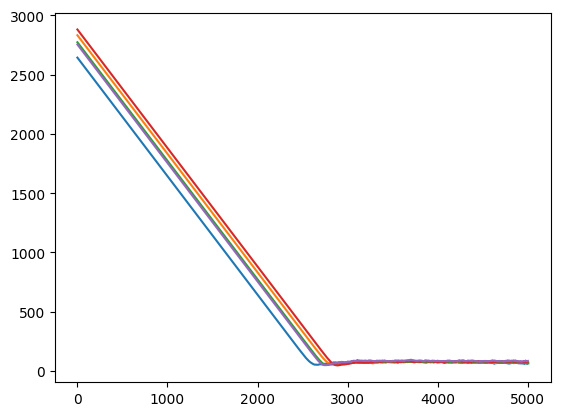

In [17]:
for i in 1:5
     plot(dm_div[i])
end

In [18]:
println(r2_score(y_true, pred(df_test, xnormal, robustModel.regressionModel)))
for i in 1:5
    println(r2_score(y_true, pred(df_test, xr1_div[i], robustModel.regressionModel)))
end

0.7231069800180693
0.7019495465627987
0.6797288977222973
0.662548663366363
0.636442403320453
0.6978861788943034


In [19]:
println(r2_score(y_true, pred(df_test, xnormal, robustModel.regressionModel)))
for i in 1:5
    println(r2_score(y_true, pred(df_test, xr2_div[i], robustModel.regressionModel)))
end

0.7231069800180693
0.6891043546533663
0.656744036222698
0.6994170014707036
0.7131261829809437
0.7134428579695602


In [33]:
verbosity = 10
itmax = 500
sample = 128

ambiguity = "wasserstein"
robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LinearRegression())
α = 1/norm(robustModel.descent_direction)
projParams = ProjParams(Int(2000), 1e-5, sample, para_proj=Sequential(), para_inter=Sequential())
optParams = OptParams(itmax, 1e-7, α, verbosity = verbosity);

In [45]:
dm_was = []
xr1_was = []
xr2_was = []
r1_was = []
r2_was = []
for ϵ in [0.001,0.005,0.01,0.05,0.1,0.5]
    println(" ")
    println("espilon = ", ϵ)
    println(" ")
    robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LinearRegression())
#     x0 = init_proj(df_train, robustModel, projParams)
    x0 = initialize(df_train, robustModel, WassersteinSet())
    xalg, yalg, dm, mem, mini = run_algo(x0, df_train, robustModel, optParams, projParams)
    xrobust1 = getsolution(xalg, ambiguity, nbfeatures)
    xrobust2 = getsolution(mem, ambiguity, nbfeatures)
    y_pred1 = pred(df_test, xrobust1, robustModel.regressionModel)
    y_pred2 = pred(df_test, xrobust2, robustModel.regressionModel)
    r1 = r2_score(y_true, y_pred1)
    r2 = r2_score(y_true, y_pred2)
    push!(dm_was, dm)
    push!(xr1_was, xrobust1)
    push!(xr2_was, xrobust2)
    push!(r1_was, r1)
    push!(r2_was, r2)
end

 
espilon = 0.001
 
10 0.0 20 0.0 30 0.0 40 0.0 50 0.0 60 0.0 70 0.0 80 0.0 90 0.0 100 0.0 110 0.0 120 0.0 130 0.0 140 0.0 150 0.0 160 0.0 

LoadError: [91mInterruptException:[39m

In [46]:
for i in 1:3
     plot(dm_was[i])
end

LoadError: [91mBoundsError: attempt to access 0-element Array{Any,1} at index [1][39m

In [47]:
println(r2_score(y_true, pred(df_test, xnormal, robustModel.regressionModel)))
for i in 1:3
    println(r2_score(y_true, pred(df_test, xr1_was[i], robustModel.regressionModel)))
end

0.7231069800180693


LoadError: [91mBoundsError: attempt to access 0-element Array{Any,1} at index [1][39m

In [48]:
println(r2_score(y_true, pred(df_test, xnormal, robustModel.regressionModel)))
for i in 1:3
    println(r2_score(y_true, pred(df_test, xr2_was[i], robustModel.regressionModel)))
end

0.7231069800180693


LoadError: [91mBoundsError: attempt to access 0-element Array{Any,1} at index [1][39m

In [ ]:
rs = []
for i in 1:100
#     print("i = ", i)
    xnormal = normal_opt(df_train, solver, robustModel.regressionModel)
    y_pred = pred(df_test, xnormal, robustModel.regressionModel)
    y_true = df_test[:,end]
    push!(rs, r2_score(y_true, y_pred))
end

In [ ]:
for i in 1:nprocs()
    open(string("res_housing_",string(i),".txt"), "a") do f
        write(f, "\n \n \n Wasserstein \n \n \n")       
    end
end

In [ ]:
for i in 1:20
    (i % 1 == 0) && println(i, " ")
    df_train, df_test = create_data("housing_scale", nbfeatures, 0.1, train_test_split)
    x0 = init_proj(df_train, robustModel, projParams)
    xalg, yalg, dmwas, mem, mini = run_algo(x0, df_train, robustModel, optParams, projParams)
    xrobust1 = getsolution(xalg, ambiguity, nbfeatures)
    xrobust2 = getsolution(mem, ambiguity, nbfeatures)
    y_pred1 = pred(df_test, xrobust1, robustModel.regressionModel)
    y_pred2 = pred(df_test, xrobust2, robustModel.regressionModel)
    y_true = df_test[:,end]
    r1 = r2_score(y_true, y_pred1)
    r2 = r2_score(y_true, y_pred2)
    if r1 > r2
        push!(rswas, r1)
    else
        push!(rswas, r2)
    end
end

In [ ]:
for i in 1:10
    (i % 1 == 0) && println(i, " ")
    df_train, df_test = create_data("housing_scale", nbfeatures, 0.1, train_test_split)
#     x0 = init_proj(df_train, robustModel, projParams)
    x0 = rand(size(robustModel.descent_direction))
    println("init ok")
    xalg, yalg, dmwas, mem, mini = run_algo(x0, df_train, robustModel, optParams, projParams)
    xrobust1 = getsolution(xalg, ambiguity, nbfeatures)
    xrobust2 = getsolution(mem, ambiguity, nbfeatures)
    y_pred1 = pred(df_test, xrobust1, robustModel.regressionModel)
    y_pred2 = pred(df_test, xrobust2, robustModel.regressionModel)
    y_true = df_test[:,end]
    r1 = r2_score(y_true, y_pred1)
    r2 = r2_score(y_true, y_pred2)
    if r1 > r2
        push!(rskl, r1)
    else
        push!(rskl, r2)
    end
end

In [ ]:
# x0 = init_proj(df_train, robustModel, projParams)
# println("init ok")
xalg, yalg, dmwas, mem, mini = run_algo(xalg, df_train, robustModel, optParams, projParams)
xrobust1 = getsolution(xalg, ambiguity, nbfeatures)
xrobust2 = getsolution(mem, ambiguity, nbfeatures)
y_pred1 = pred(df_test, xrobust1, robustModel.regressionModel)
y_pred2 = pred(df_test, xrobust2, robustModel.regressionModel)
y_true = df_test[:,end]
r1 = r2_score(y_true, y_pred1)
r2 = r2_score(y_true, y_pred2)


In [ ]:
plot(dmwas)

In [ ]:
xnormal = normal_opt(df_train, solver, robustModel.regressionModel)
y_pred = pred(df_test, xnormal, robustModel.regressionModel)
y_true = df_test[:,end]
r2_score(y_true, y_pred)

In [ ]:
PyPlot.plt[:hist](rs[1:23],200)
PyPlot.plt[:hist](rswas[1:23],15)
PyPlot.plt[:hist](rskl,15)
xlim(0,1)

In [ ]:



ambiguity = "KLdivergence"
robustModel = RobustModel(N, nbfeatures, ϵ, ambiguity, LinearRegression())
α = 1/norm(robustModel.descent_direction)
projParams = ProjParams(Int(1e6), 1e-5, sample, para_proj=Sequential(), para_inter=Sequential())
optParams = OptParams(itmax, 1e-7, α, verbosity = verbosity);

println("Solve KL")
x0 = init_proj(df_train, robustModel, projParams)
println("fin_init")
xalg, yalg, dmKL, mem, mini = run_algo(x0, df_train, robustModel, optParams, projParams)
xrobust1 = getsolution(xalg, ambiguity, nbfeatures)
xrobust2 = getsolution(mem, ambiguity, nbfeatures)
y_pred1 = pred(df_test, xrobust1, robustModel.regressionModel)
y_pred2 = pred(df_test, xrobust2, robustModel.regressionModel)
y_true = df_test[:,end]
r1 = r2_score(y_true, y_pred1)
r2 = r2_score(y_true, y_pred2)
if r1 > r2
    println(" ")
    println(" ")
    println("xrobKL = ", xrobust1)
    println("r1 = ", r2_score(y_true, y_pred1))
    println(" ")
    println(" ")
else
    println(" ")
    println(" ")
    println("xrobKl = ", xrobust2)
    println("r2 = ", r2_score(y_true, y_pred2))
    println(" ")
    println(" ")
end

println("Fin KL")

println("dmwas = ", dmwas)
println("dmKl = ", dmKL)